In [1]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
from mpl_toolkits import mplot3d
import warnings
import os
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/Users/soumendu/DATA-SCIENCE/Kaggle-data/Predicting-House-Prices'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/soumendu/DATA-SCIENCE/Kaggle-data/Predicting-House-Prices/housing.csv
/Users/soumendu/DATA-SCIENCE/Kaggle-data/Predicting-House-Prices/kc_house_data.csv


In [3]:
df=pd.read_csv("/Users/soumendu/DATA-SCIENCE/Kaggle-data/Predicting-House-Prices/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
corr_matrix = df.corr()

In [7]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

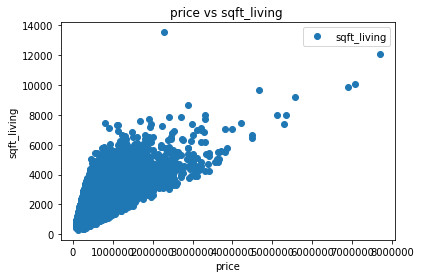

In [8]:
df.plot(x='price', y='sqft_living', style='o')  
plt.title('price vs sqft_living ')  
plt.xlabel('price')  
plt.ylabel('sqft_living')  
plt.show()

In [9]:
X = df['price'].values.reshape(-1,1)
y = df['sqft_living'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
 X_test.mean()

538878.1616286243

In [11]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[1117.9308905]
[[0.0017768]]


In [12]:
#column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df=pd.read_csv("/Users/soumendu/DATA-SCIENCE/Kaggle-data/Predicting-House-Prices/housing.csv")
#df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv("/Users/soumendu/DATA-SCIENCE/Kaggle-data/Predicting-House-Prices/housing.csv")
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [13]:
#df = pd.read_csv("/Users/soumendu/DATA-SCIENCE/Kaggle-data/Predicting-House-Prices/housing.csv",  delimiter=r"\s+" , header=None)
df = pd.read_csv("/Users/soumendu/DATA-SCIENCE/Kaggle-data/Predicting-House-Prices/housing.csv",  sep = "\s+|\t+|\s+\t+|\t+\s+" , header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

/Users/soumendu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
df = pd.read_csv("/Users/soumendu/DATA-SCIENCE/Kaggle-data/Predicting-House-Prices/housing.csv",  delimiter=r"\s+" , header=None)
#df = pd.read_csv("/Users/soumendu/DATA-SCIENCE/Kaggle-data/Predicting-House-Prices/housing.csv",  sep = "\s+|\t+|\s+\t+|\t+\s+" , header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
df.shape

(506, 14)

In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [18]:
df["CRIM"].mean()
df["CHAS"].mean()

0.0691699604743083

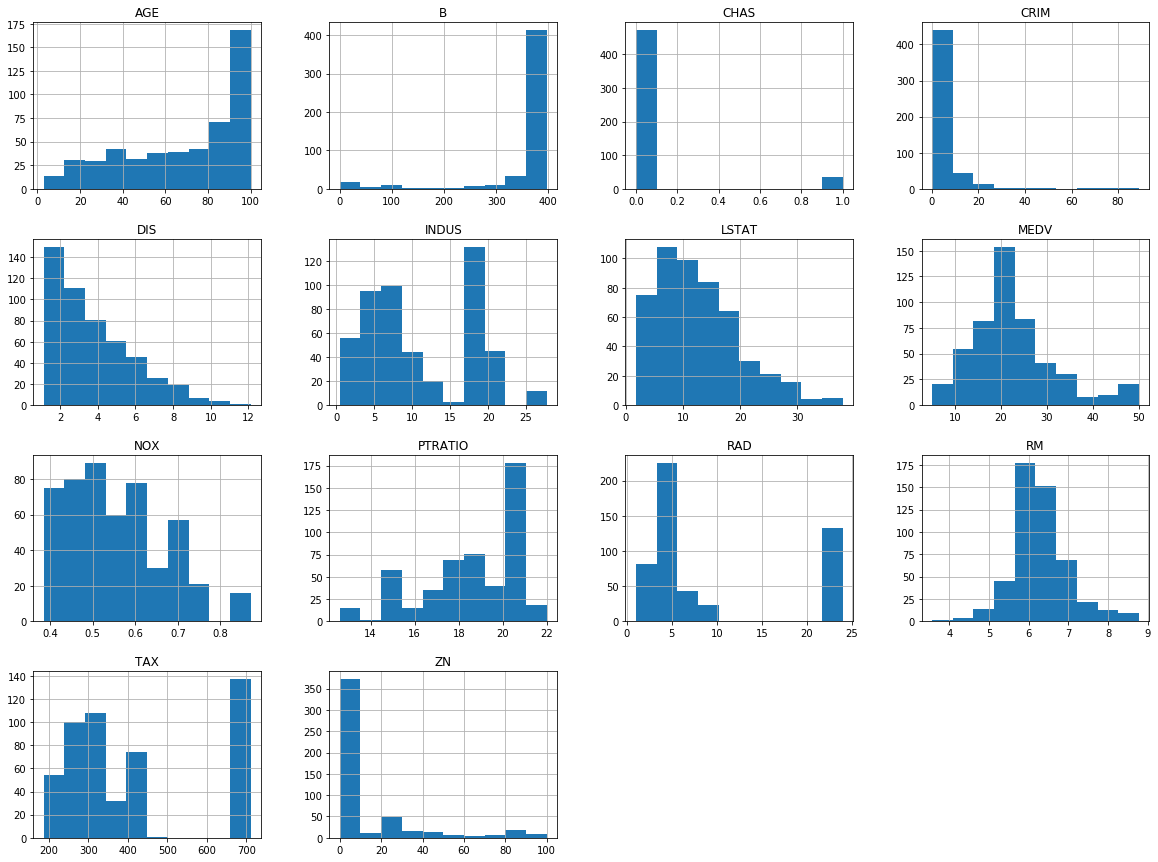

In [19]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
df.hist(figsize=(20,15))
plt.show()


In [20]:
df["INDUS"].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

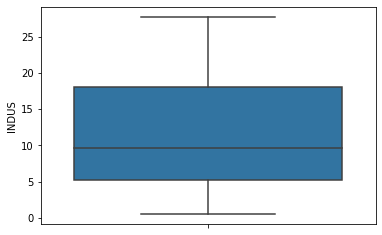

In [21]:
import seaborn as sns
sns.boxplot( y=df["INDUS"] );
plt.show()

In [22]:
df["CRIM"].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677082
max       88.976200
Name: CRIM, dtype: float64

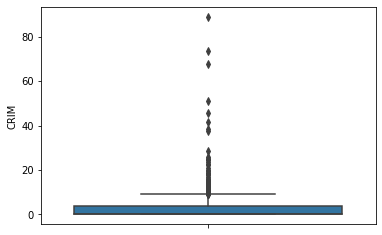

In [23]:
sns.boxplot( y=df["CRIM"] );
plt.show()

In [24]:
df["DIS"].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

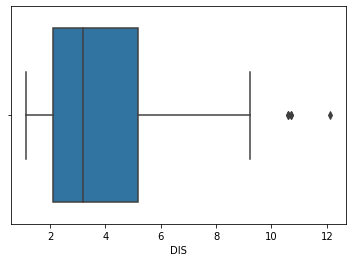

In [25]:
import seaborn as sns
sns.boxplot(x=df['DIS'])

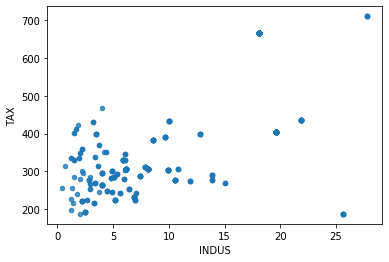

In [26]:
df.plot(kind="scatter" , x = "INDUS" , y = "TAX" , alpha = 0.8)

In [27]:
df["INDUS"].head()

0    2.31
1    7.07
2    7.07
3    2.18
4    2.18
Name: INDUS, dtype: float64

In [32]:
from scipy import stats
df.apply(stats.zscore)
df["INDUS_zscore"].head()

KeyError: 'INDUS_zscore'

In [33]:
for col in df.columns:
    col_zscore = col + "_zscore"
    df[col_zscore] = (df["INDUS"] - df["INDUS"].mean())/df["INDUS"].std(ddof=0)
    #df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df["INDUS_zscore"].head()
#df.head()

0   -1.287909
1   -0.593381
2   -0.593381
3   -1.306878
4   -1.306878
Name: INDUS_zscore, dtype: float64

In [34]:
stats.zscore(df["CRIM"].head())

array([-1.2834352 , -0.25317266, -0.25415433, -0.00481018,  1.79557237])

In [35]:
stats.zscore(df.head(), axis=1)
#df["CRIM"].head()

array([[-0.32407389, -0.12415034, -0.29847824, -0.32414411, -0.31816652,
        -0.25109083,  0.40027778, -0.27870108, -0.31303334,  2.96464239,
        -0.1541494 ,  4.0857186 , -0.2688125 , -0.05748574, -0.33845377,
        -0.33845377, -0.33845377, -0.33845377, -0.33845377, -0.33845377,
        -0.33845377, -0.33845377, -0.33845377, -0.33845377, -0.33845377,
        -0.33845377, -0.33845377, -0.33845377],
       [-0.32752002, -0.32784184, -0.24452907, -0.32784184, -0.32231515,
        -0.25217687,  0.60191452, -0.26930961, -0.30427387,  2.52388236,
        -0.11808692,  4.34922153, -0.22013622, -0.07330778, -0.33483423,
        -0.33483423, -0.33483423, -0.33483423, -0.33483423, -0.33483423,
        -0.33483423, -0.33483423, -0.33483423, -0.33483423, -0.33483423,
        -0.33483423, -0.33483423, -0.33483423],
       [-0.32549115, -0.32581622, -0.24160025, -0.32581622, -0.32022962,
        -0.2402304 ,  0.40199088, -0.26664944, -0.30199275,  2.55682403,
        -0.11378731,  4.3534

In [36]:
#define function to calculate interquartile range
def find_iqr(x):
    return np.subtract(*np.percentile(x, [75, 25]))

df.apply(find_iqr)

CRIM                3.595037
ZN                 12.500000
INDUS              12.910000
CHAS                0.000000
NOX                 0.175000
RM                  0.738000
AGE                49.050000
DIS                 3.088250
RAD                20.000000
TAX               387.000000
PTRATIO             2.800000
B                  20.847500
LSTAT              10.005000
MEDV                7.975000
CRIM_zscore         1.883690
ZN_zscore           1.883690
INDUS_zscore        1.883690
CHAS_zscore         1.883690
NOX_zscore          1.883690
RM_zscore           1.883690
AGE_zscore          1.883690
DIS_zscore          1.883690
RAD_zscore          1.883690
TAX_zscore          1.883690
PTRATIO_zscore      1.883690
B_zscore            1.883690
LSTAT_zscore        1.883690
MEDV_zscore         1.883690
dtype: float64

In [37]:
#In other words, the Inter-Quartile Range (IQR) is the first quartile subtracted from the third quartile; 
#these quartiles can be clearly seen on a box plot on the data.


#It is a measure of the dispersion similar to standard deviation or variance, 
#but is much more robust against outliers.

In [38]:
q3, q1 = np.percentile(df["CRIM"], [75 ,25])

In [39]:
iqr = q3 - q1
print("Interquartile Range : " , iqr)

Interquartile Range :  3.5950374999999997


In [40]:
q3, q1 = np.percentile(df["ZN"], [75 ,25])
iqr = q3 - q1
print("Interquartile Range : " , iqr)

Interquartile Range :  12.5


In [41]:
#define function to calculate interquartile range of a single column
def single_iqr(x):
    
    return np.subtract(*np.percentile(x, [75, 25]))
#calculate IQR for 'Physics' and 'Chemistry' columns
df[['CRIM', 'ZN' , 'CHAS']].apply(single_iqr)


CRIM     3.595037
ZN      12.500000
CHAS     0.000000
dtype: float64

In [42]:
df.apply(single_iqr)

CRIM                3.595037
ZN                 12.500000
INDUS              12.910000
CHAS                0.000000
NOX                 0.175000
RM                  0.738000
AGE                49.050000
DIS                 3.088250
RAD                20.000000
TAX               387.000000
PTRATIO             2.800000
B                  20.847500
LSTAT              10.005000
MEDV                7.975000
CRIM_zscore         1.883690
ZN_zscore           1.883690
INDUS_zscore        1.883690
CHAS_zscore         1.883690
NOX_zscore          1.883690
RM_zscore           1.883690
AGE_zscore          1.883690
DIS_zscore          1.883690
RAD_zscore          1.883690
TAX_zscore          1.883690
PTRATIO_zscore      1.883690
B_zscore            1.883690
LSTAT_zscore        1.883690
MEDV_zscore         1.883690
dtype: float64

IndexError: index 14 is out of bounds for axis 0 with size 14

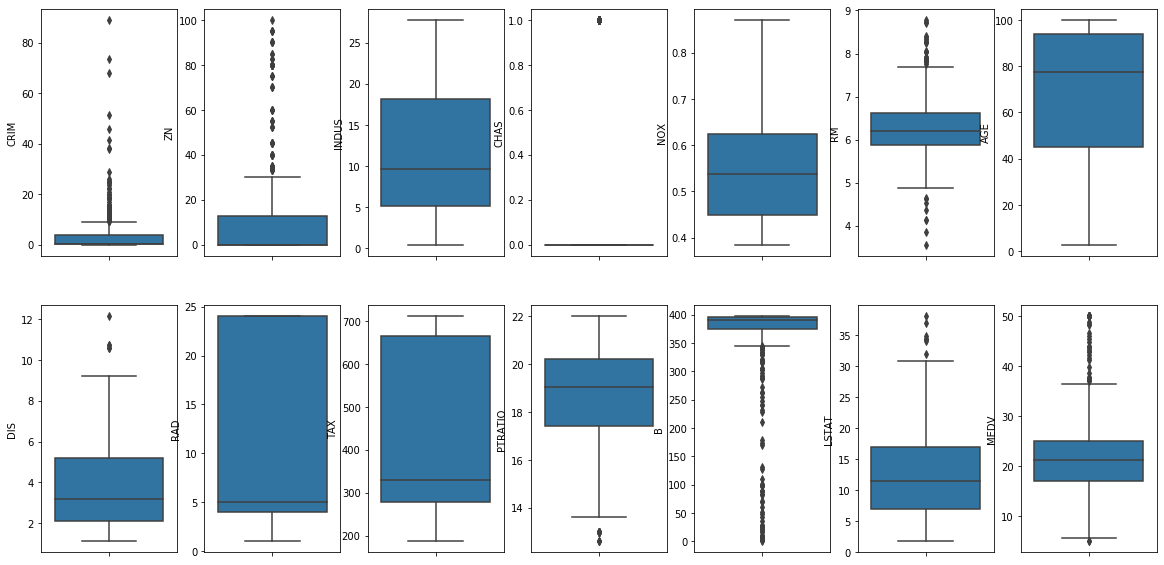

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

In [ ]:
df = df[~(df['MEDV'] >= 50.0)]
print(np.shape(df))

In [ ]:
ax = sns.distplot(df["INDUS"])

In [ ]:
sns.distplot(df["INDUS"],bins=20,kde=True)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

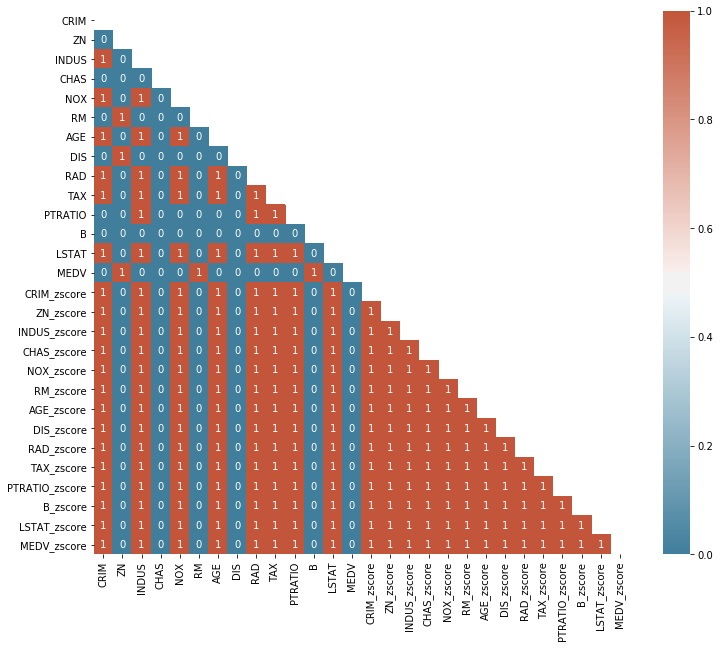

In [44]:
corr = df.corr()>0.3
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

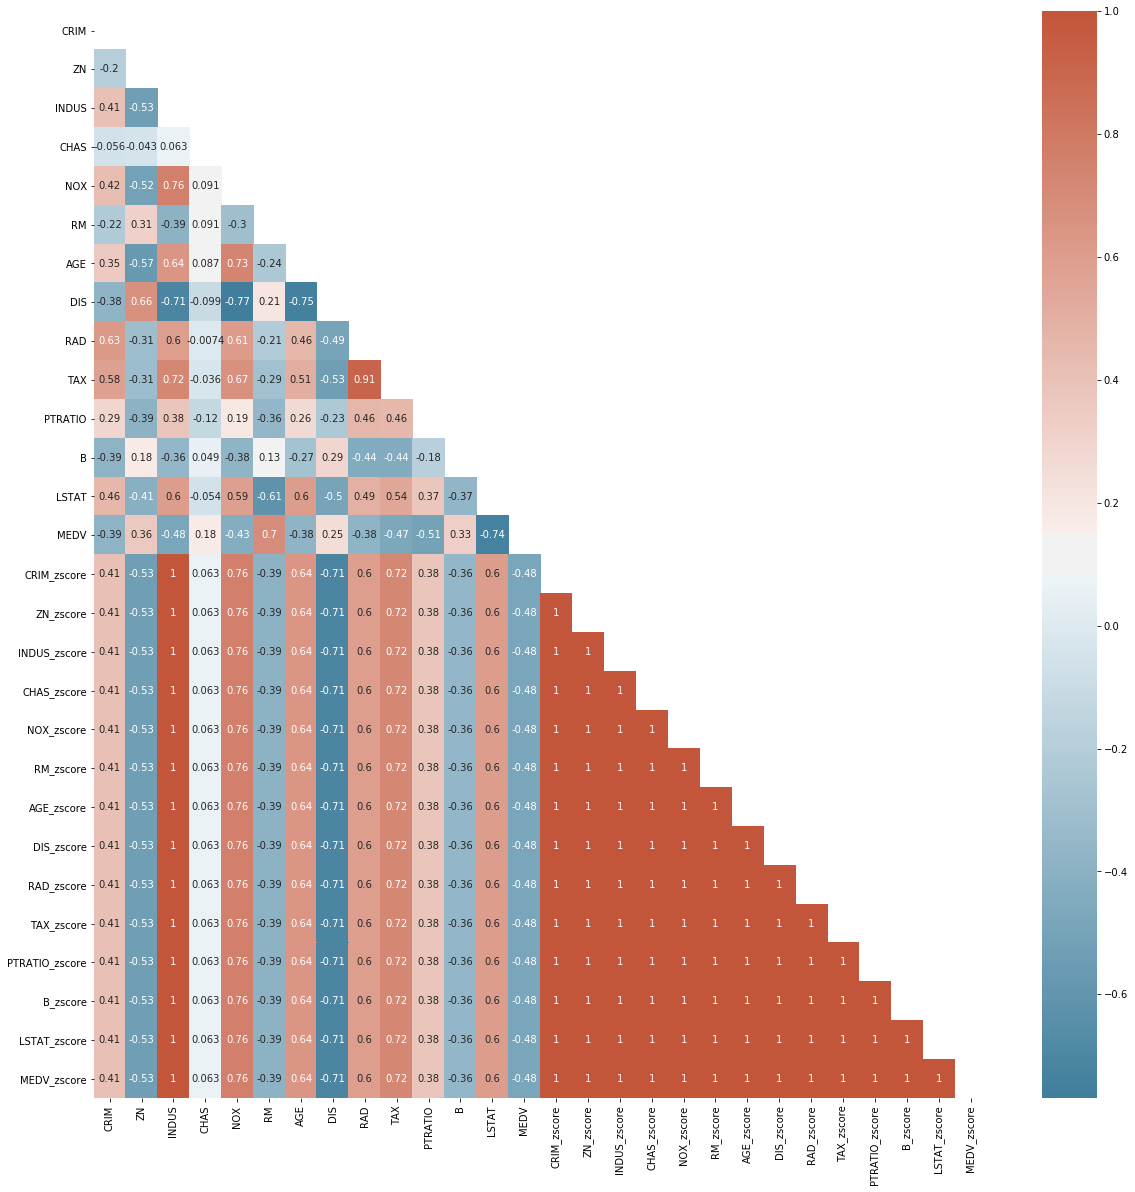

In [45]:
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

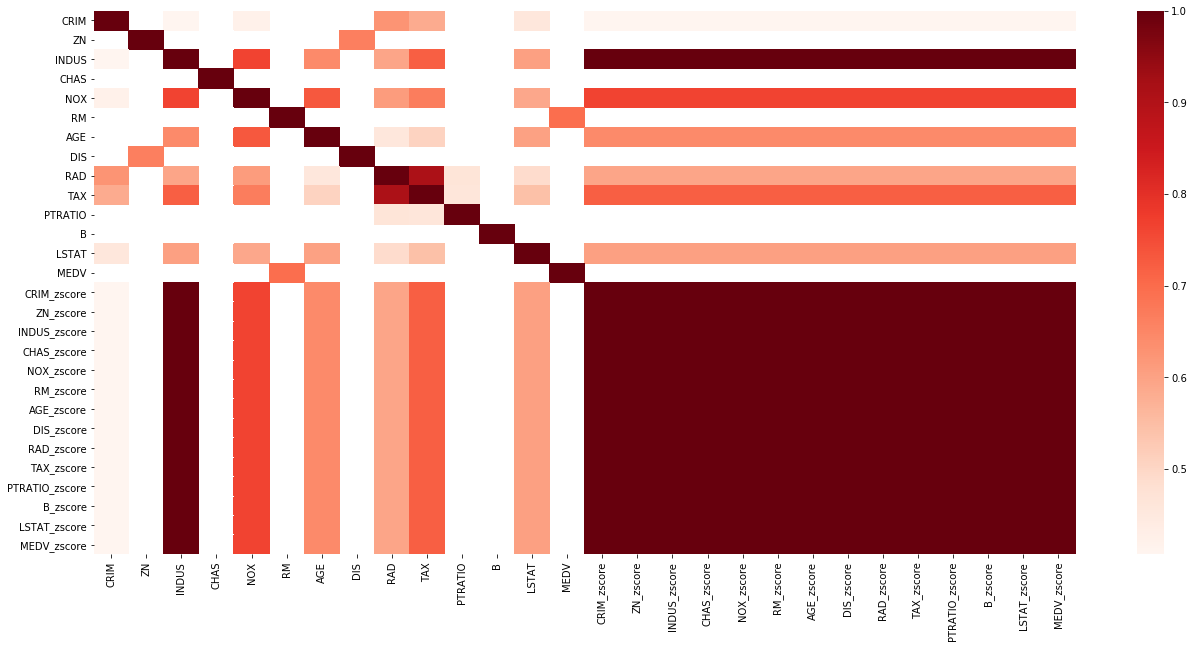

In [46]:
corr = df.corr()
kot = corr[corr>=.4]
plt.figure(figsize=(22,10))
sns.heatmap(kot, cmap="Reds")

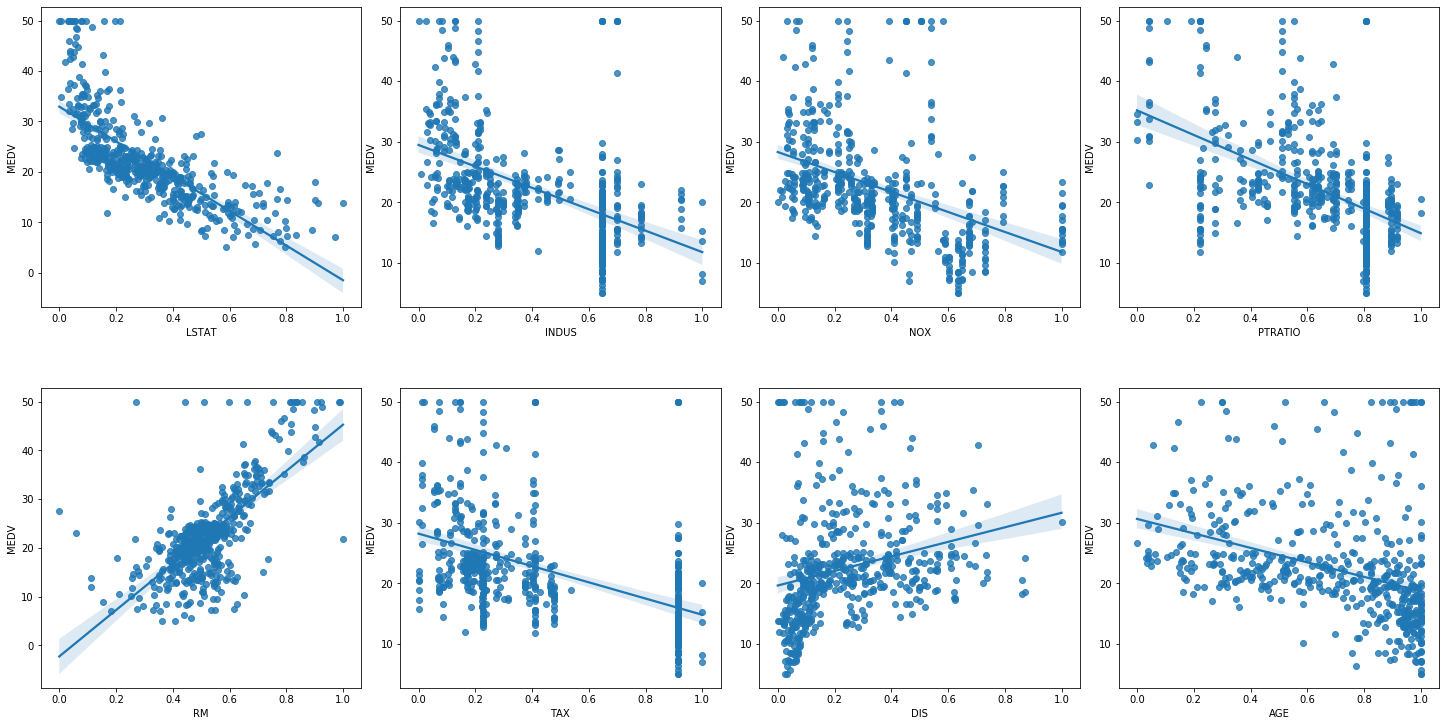

In [47]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [48]:
df1 = df[['RAD','TAX', 'LSTAT', 'INDUS', 'RM', 'TAX', 'NOX']]
df1.head()
df1.corr()

,RAD,TAX,LSTAT,INDUS,RM,TAX,NOX
RAD,1.000000,0.910228,0.488676,0.595129,-0.209847,0.910228,0.611441
TAX,0.910228,1.000000,0.543993,0.720760,-0.292048,1.000000,0.668023
LSTAT,0.488676,0.543993,1.000000,0.603800,-0.613808,0.543993,0.590879
INDUS,0.595129,0.720760,0.603800,1.000000,-0.391676,0.720760,0.763651
RM,-0.209847,-0.292048,-0.613808,-0.391676,1.000000,-0.292048,-0.302188
TAX,0.910228,1.000000,0.543993,0.720760,-0.292048,1.000000,0.668023
NOX,0.611441,0.668023,0.590879,0.763651,-0.302188,0.668023,1.000000


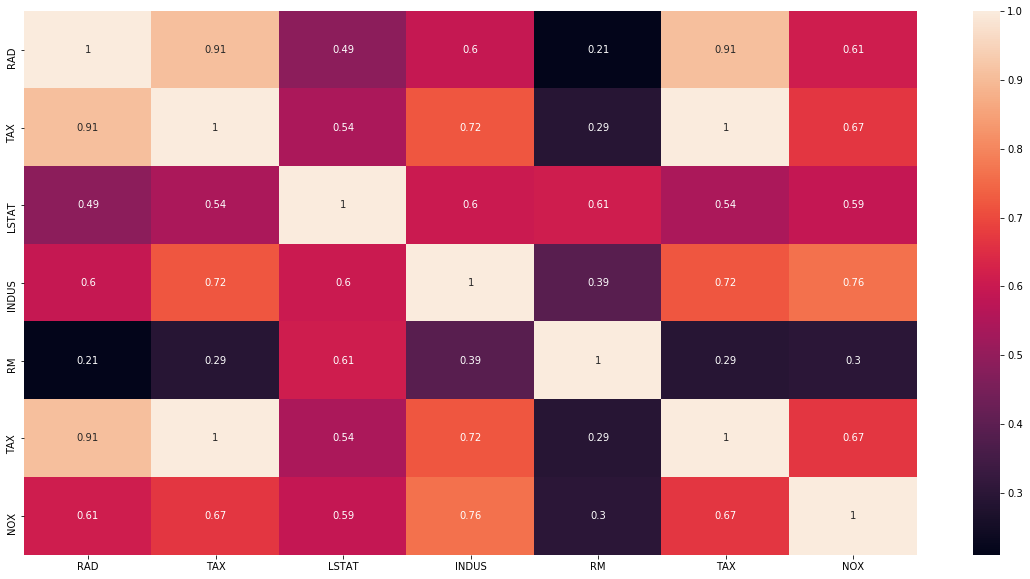

In [49]:
plt.figure(figsize=(20, 10))
sns.heatmap(df1.corr().abs(),  annot=True)

In [50]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [51]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -0.05 (+/- 0.06)
MSE: -0.05 (+/- 0.05)
MSE: -0.04 (+/- 0.04)


In [52]:
df.skew()

CRIM              5.223149
ZN                2.225666
INDUS             0.295022
CHAS              3.405904
NOX               0.729308
RM                0.403612
AGE              -0.598963
DIS               1.011781
RAD               1.004815
TAX               0.669956
PTRATIO          -0.802325
B                -2.890374
LSTAT             0.906460
MEDV              1.108098
CRIM_zscore       0.295022
ZN_zscore         0.295022
INDUS_zscore      0.295022
CHAS_zscore       0.295022
NOX_zscore        0.295022
RM_zscore         0.295022
AGE_zscore        0.295022
DIS_zscore        0.295022
RAD_zscore        0.295022
TAX_zscore        0.295022
PTRATIO_zscore    0.295022
B_zscore          0.295022
LSTAT_zscore      0.295022
MEDV_zscore       0.295022
dtype: float64

In [53]:
#Log transform
crim_log = np.log(df['CRIM'])
crim_log.skew()

0.4059344988496048

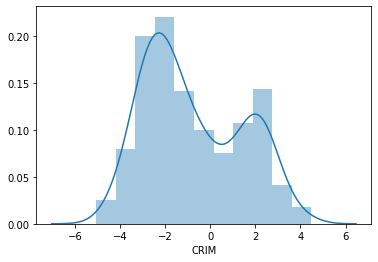

In [54]:
ax = sns.distplot(crim_log)

In [55]:
# Square root transform
crim_sqrt = np.sqrt(df['CRIM'])
crim_sqrt.skew()

2.024382103123676

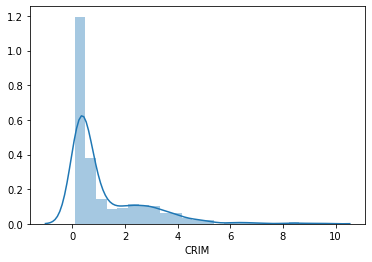

In [56]:
ax = sns.distplot(crim_sqrt)

In [57]:
# Box-Cox Transform
crim_boxcox = stats.boxcox(df['CRIM'])[0]
pd.Series(crim_boxcox).skew()

0.09364917268984103

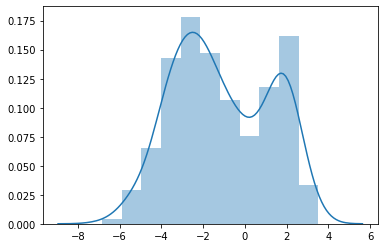

In [58]:
ax = sns.distplot(crim_boxcox)